# Objective
Find indicators which produce consistent results when dealing with offset-ed sinewave data with same amplitude

In [1]:
import ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Generate data

In [91]:
def generate_sine(amp=50, offset=100, cycle=3, steps=1000):
    x = np.arange(0, 2 * np.pi, 2 * np.pi / (steps))
    y = amp * np.sin(cycle * x) + offset

    df = pd.DataFrame()
    df['close'] = y
    return df

1000
1000


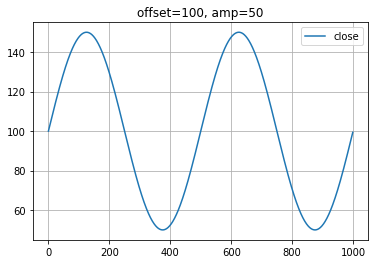

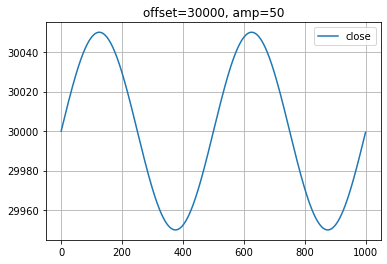

In [92]:
cycle=2
steps=1000

amp1 = 50
offset1 = 100

df1 = generate_sine(amp=amp1, offset=offset1, cycle=cycle, steps=steps)
df1.plot(grid=True, title=f'offset={offset1}, amp={amp1}')
print(len(df1))

amp2 = 50
offset2 = 30000
df2 = generate_sine(amp=amp2, offset=offset2, cycle=cycle, steps=steps)
df2.plot(grid=True, title=f'offset={offset2}, amp={amp2}')
print(len(df2))

# Indicators

In [93]:
from ta.trend import *
from transform import difference, log_and_difference, max_min_normalize, mean_normalize

def add_indicators(df, fillna=False):    
    df['close_diff'] = difference(df['close'], inplace=False)
    df['close_log_diff'] = log_and_difference(df['close'], inplace=False)
    df['close_mean'] = mean_normalize(df['close'], inplace=False)
    
    df['macd_diff'] = macd_diff(df['close'], fillna=fillna)
    
    df['ema10'] = ema_indicator(df['close'], 10, fillna=fillna)
    df['ema25'] = ema_indicator(df['close'], 25, fillna=fillna)
    df['ema50'] = ema_indicator(df['close'], 50, fillna=fillna)

    df['ema25_50_diff'] = df['ema25']-df['ema50']
    df['ema25_50_diff_norm'] = 1-df['ema50']/df['ema25']
    df['trend_ema25_50'] = np.where(df['ema25_50_diff']>0, 1, -1)

    df['ema10_25_diff'] = df['ema10']-df['ema25']
    df['ema10_25_diff_norm'] = 1-df['ema25']/df['ema10']
    df['trend_ema10_25'] = np.where(df['ema10_25_diff']>0, 1, -1)

    df.dropna(axis=0, inplace=True)

    return df

In [94]:
add_indicators(df1, fillna=False)

,close,close_diff,close_log_diff,close_mean,macd_diff,ema10,ema25,ema50,ema25_50_diff,ema25_50_diff_norm,trend_ema25_50,ema10_25_diff,ema10_25_diff_norm,trend_ema10_25
49,128.878635,0.515188,0.004005,0.816403,0.008498,126.477481,122.349817,116.871521,5.478296,0.044776,1,4.127664,0.032636,1
50,129.389263,0.510627,0.003954,0.830838,0.000530,127.006896,122.891313,117.362413,5.528900,0.044990,1,4.115583,0.032404,1
51,129.895249,0.505987,0.003903,0.845142,-0.007103,127.532051,123.430078,117.853897,5.576180,0.045177,1,4.101974,0.032164,1
52,130.396515,0.501266,0.003852,0.859313,-0.014413,128.052863,123.965957,118.345764,5.620193,0.045337,1,4.086905,0.031916,1
53,130.892981,0.496466,0.003800,0.873348,-0.021409,128.569248,124.498805,118.837812,5.660993,0.045470,1,4.070442,0.031660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,96.860474,0.626814,0.006492,-0.088755,0.074535,94.060791,89.589215,83.153385,6.435830,0.071837,1,4.471576,0.047539,1
996,97.487784,0.627310,0.006456,-0.071021,0.071965,94.683881,90.196797,83.715518,6.481279,0.071857,1,4.487084,0.047390,1
997,98.115491,0.627707,0.006418,-0.053275,0.069384,95.307810,90.805927,84.280223,6.525704,0.071864,1,4.501883,0.047235,1
998,98.743495,0.628004,0.006380,-0.035522,0.066792,95.932480,91.416509,84.847410,6.569099,0.071859,1,4.515970,0.047074,1


In [95]:
add_indicators(df2, fillna=False)

,close,close_diff,close_log_diff,close_mean,macd_diff,ema10,ema25,ema50,ema25_50_diff,ema25_50_diff_norm,trend_ema25_50,ema10_25_diff,ema10_25_diff_norm,trend_ema10_25
49,30028.878635,0.515188,0.000017,0.816403,0.008498,30026.477481,30022.349817,30016.871521,5.478296,0.000182,1,4.127664,0.000137,1
50,30029.389263,0.510627,0.000017,0.830838,0.000530,30027.006896,30022.891313,30017.362413,5.528900,0.000184,1,4.115583,0.000137,1
51,30029.895249,0.505987,0.000017,0.845142,-0.007103,30027.532051,30023.430078,30017.853897,5.576180,0.000186,1,4.101974,0.000137,1
52,30030.396515,0.501266,0.000017,0.859313,-0.014413,30028.052863,30023.965957,30018.345764,5.620193,0.000187,1,4.086905,0.000136,1
53,30030.892981,0.496466,0.000017,0.873348,-0.021409,30028.569248,30024.498805,30018.837812,5.660993,0.000189,1,4.070442,0.000136,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,29996.860474,0.626814,0.000021,-0.088755,0.074535,29994.060791,29989.589215,29983.153385,6.435830,0.000215,1,4.471576,0.000149,1
996,29997.487784,0.627310,0.000021,-0.071021,0.071965,29994.683881,29990.196797,29983.715518,6.481279,0.000216,1,4.487084,0.000150,1
997,29998.115491,0.627707,0.000021,-0.053275,0.069384,29995.307810,29990.805927,29984.280223,6.525704,0.000218,1,4.501883,0.000150,1
998,29998.743495,0.628004,0.000021,-0.035522,0.066792,29995.932480,29991.416509,29984.847410,6.569099,0.000219,1,4.515970,0.000151,1


<AxesSubplot:>

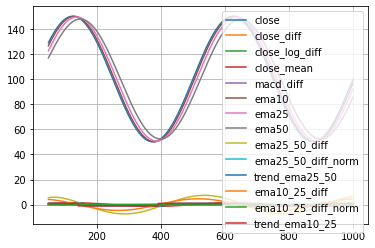

In [96]:
df1.plot(grid=True)

<AxesSubplot:>

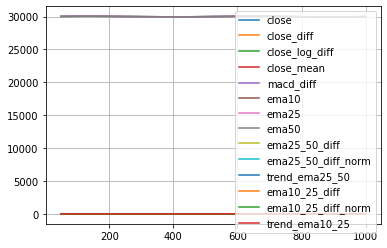

In [97]:
df2.plot(grid=True)

# Show Chart

In [98]:
def show_chart(df, columns1, columns2, columns3, title):
    fig, axs = plt.subplots(1, 3, figsize=(15, 3))
    fig.suptitle(title)

    df[columns1].plot(ax=axs[0], grid=True)
    df[columns2].plot(ax=axs[1], grid=True)
    df[columns3].plot(ax=axs[2], grid=True)

In [102]:
columns1 = ['close', 'ema10', 'ema25', 'ema50']
columns2 = ['ema10_25_diff', 'ema25_50_diff', 'macd_diff', 'trend_ema10_25', 'trend_ema25_50']
columns3 = ['ema10_25_diff_norm', 'ema25_50_diff_norm', 'close_diff', 'close_log_diff', 'close_mean']

In [105]:
columns1 = ['close']
columns2 = ['ema10_25_diff', 'ema25_50_diff', 'trend_ema10_25', 'trend_ema25_50']
columns3 = ['macd_diff', 'close_diff']

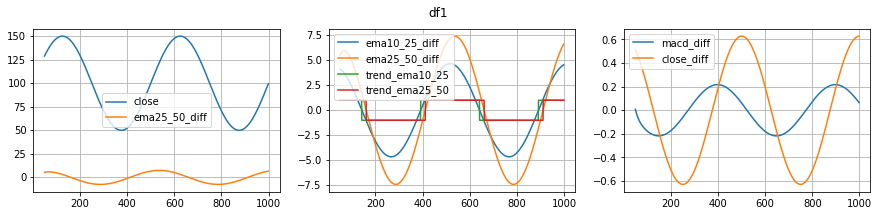

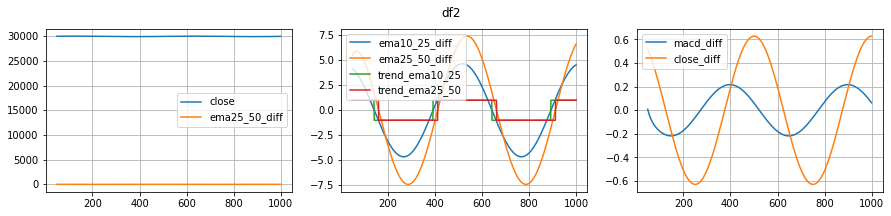

In [106]:
show_chart(df1, columns1, columns2, columns3, 'df1')
show_chart(df2, columns1, columns2, columns3, 'df2')

# Compare observables indicators between data1 & data2

In [66]:
def indicator_diff(df1, df2, columns, index):
    for col in columns:
        diff = df2[col][index]-df1[col][index]
        diff_pct = 100*(df2[col][index]/df1[col][index] - 1)
        result = diff_pct > -0.01 and diff_pct < 0.01
        print(f"'{col}' difference = {diff} ({round(diff_pct, 4)}%). {'PASSED' if result else ''}")

In [67]:
columns = ['close', 'close_diff', 'close_log_diff', 'close_mean', 'ema25', 'ema25_50_diff', 'ema10_25_diff_norm', 'macd_diff']
indicator_diff(df1, df2, columns, 500)

'close' difference = 29900.0 (29900.0%). 
'close_diff' difference = 1.7195134205394424e-12 (0.0%). PASSED
'close_log_diff' difference = -0.006281897560787897 (-99.6677%). 
'close_mean' difference = 4.0174264732023907e-16 (-100.0%). 
'ema25' difference = 29900.000000000025 (32274.9024%). 
'ema25_50_diff' difference = 8.65441052155802e-12 (0.0%). PASSED
'ema10_25_diff_norm' difference = -0.046584892917293064 (-99.676%). 
'macd_diff' difference = -5.3290705182007514e-14 (-0.0%). PASSED
